#### Notebook 2: Linear Regression with Gradient Descent 

Little Introduction before we go on. Myself Pathik Viramgama (Pr0fess0r) and am doing a 75 days kaggle challenge where I will try rise up to as much high in rank as possible in a total of 300 hours (4 hours per day). So upvote! What we are going to do here is to see what is the mathematical aspect that goes behind in Linear Regression with Gradient Descent. This is the **second** notebook in the series of scratch coding. We will progress in the difficulty as we go ahead and will surely cover all the basic ML codes from scratch to the deep learning.

# Importing Dataset 
### and Legen......wait for it......dary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data\salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Preprocessing Stuff

In [3]:
# Seperating features and target
x = df.drop(['Unnamed: 0', 'Salary'], axis = 1)
y = df.drop(['Unnamed: 0', 'YearsExperience'], axis = 1)

In [4]:
# converting the dataframe to numpy array so that all our data becomes in one format
# I chose numpy array because it is faster
x = pd.DataFrame(x).to_numpy()
y = pd.DataFrame(y).to_numpy()

Yeah I know I am cheating, using a library. But hear me out please. This notebook needs you to focus on how the Linear Regression works with Gradient Descent, not how split occurs. But I have created that pre processing stuff from scratch in another notebook. You can check that out in my profile [here](https://www.kaggle.com/pathikviramgama/code?scroll=true)

In [5]:
# Doing a train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Simple Linear Regression with Library

Here we will simply train the model with our data and see what is the accuracy for a reference for our algorithm.

In [6]:
# The easy version
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LR_weights = LR.coef_[0][0]
LR_b = LR.intercept_[0]

LR_R2 = LR.score(x_test, y_test)
print(f'Coefficient of Determination R2: {LR_R2}')

Coefficient of Determination R2: 0.9553063138044949


Now lets plot a simple graph for our test data and plot our regression line as well

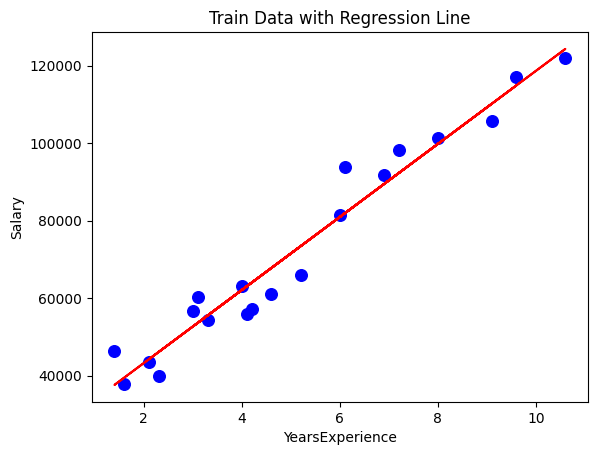

In [7]:
# Plot the line along with our training data points
plt.scatter(x_train, y_train, s=70, c='b')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Train Data with Regression Line')

plt.plot(x_train, (LR_b + LR_weights*x_train), c='r')

plt.show()

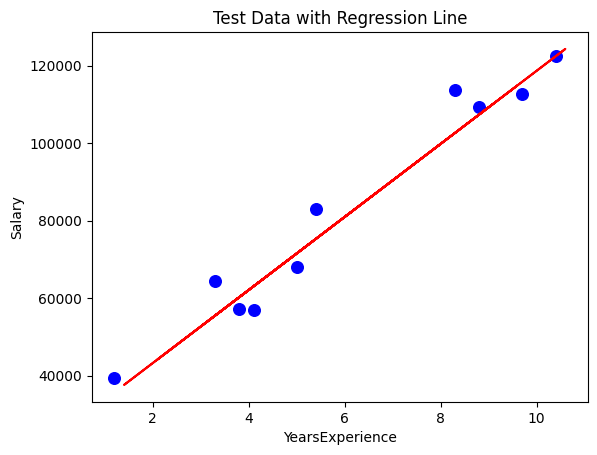

In [8]:
# Plot the line along with our test data points
plt.scatter(x_test, y_test, s=70, c='b')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Test Data with Regression Line')

plt.plot(x_train, (LR_b + LR_weights*x_train), c='r')

plt.show()

# LinearRegression from Scratch with Gradient Descent

Now forget Machine Learning. Imagine you have a machine that takes paper and makes them into money. This machine has two things we need to maintain. The process takes two steps. Printing the image of the currency on the paper through ink. And second is cutting the full paper into appropriate size of a note with sharp scissors. All we need to do is maintain the ink in the machine and keep the scissors sharp. Either one of these malfunctions, our money will not be usable.

Guess what? That was machine learning. The Higher ups calls the machine a Hypothesis Function $\large h_{(\overrightarrow{W}, b)}(x)$. The paper intput is generally called features $\large x$. The money output is generally called target $\large y$. The maintainance aspects are called weights. Specifically in our case, ink is $\large b$ and scissor is $\large \overrightarrow{W}$

Before you start making money, you will need paper, ink and scissors, right?. You will also need the machine itself too. So we need to initialize everything in code too.

So lets gather the materials, scissor and ink, first. We will make the weights first. Weights will always be of same size as your dataset. I have created two arrays, **weights** and **bias**, instead of one so that we can understand better what is happening. They are randmoly initialized with floats instead of all zeros because random initialization gets us faster answer than all zeroes, at least thats what higher ups say. Can't grasp that? Then do it because I said so.

In [9]:
# initializing parameters
def initParameters(x):
    weights = np.zeros((len(x[0]), 1))
    bias = 0
    return weights, bias

# we will not call it seperately out here. We will call it inside the training phase itself

Now we get the machine. The hypothesis function in a way is literally a prediction through equation of line. Here is the formula for it in our case of a single feature:

$\large h_{(W,b)}(x) = {W} \cdot x + b$

The weights vector becomes a single value since it is assigned for every feature in **x**

In [10]:
# Hypothesis Function used for getting prediction
def hypothesisFunction(x, weights, bias):
    h = np.dot(x, weights) + bias
    return h

Now this is also the part of machine. It is analogus to the amount of scissors and ink the machine has at a point of time. It in useless higher up terms is called Cost Function. It is in layman terms an error and unlike other terms this is a single value instead of an array. Here is the formula for it.

$\large J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x_i)) - (y_i))^2$

In [11]:
# Function to calculate Cost/total error during any point
def costFunction(x, y, weights, bias):
    m = len(y) # number of examples or rows in our dataset
    h = hypothesisFunction(x, weights, bias)# calculating the sigmoid function
    cost = -( np.sum( (h - y)**2 ) )/m
    return cost

Now we have all the ingridents required to make money from thin cellulose sheets. So how are we going to do it? Well first we somehow need to set amount of ink and size of the cuts to the perfect amount. Change in ink or the cutting can disregard the currency and land you in prision, unless you are sunny. Luckily, machine we bought was of top quality and sets the amount to perfect by itself using a few procedures. We just need to give the machine a few trial runs so that it can set the perfect amount. Those trial runs is what as a whole called machine learning. Specifically in our case it is called gradient decesnt. The amount of trials machine does is called epochs. Got it? Cause now its get extremely difficult for a layman as we actually see what happens in mathematical terms.

Firstly I would like to remind you that we have as of now these variables in the action. 
* Two weight vector $\overrightarrow{W}, b$
* A prediction vector $h_{(\overrightarrow{W}, b)}(x)$
* An error value $J$
* The features itself $x$
* The target $y$

Now what we need to do is change the parameters $\overrightarrow{W}$ and $b$ to the perfect amount. We do this using, I hate to break it to you, calculus. Sed Lyf. 

But here is a rough intuition to Gradient Decent. Suppose you went up a hill and lost you keys on the way up. Now you need to go back and find it. Here are two ways you can go around that problem. Take one step down the hill and look around for the key, repeat untill found. Another approach would be take 30 steps and look around for key, repeat untill found. You would think eh we should go with the second one it would be faster. But let me add to it that in the second case there are chances you might miss the key as you are taking too many steps at a time. The problem with first one is that it is extremely slow. So we need an optimized way of searching, which according to me is around 7 steps. Getting my point, eh? 

Now the number of steps is another variable called the Learning Rate $\alpha$. This decides how fast an algorithm learns. I personally set it at 0.01. Oh and it is always between 1 and 0.

So what gradient descent does is updates the values of $\theta$ using partial differentiation of cost function. Here is the process mathematically:

$tempW = \large \overrightarrow{W} - \alpha \frac{\partial }{\partial b}J(\overrightarrow{W}, b)$

$tempb = \large b - \alpha \frac{\partial }{\partial \overrightarrow{W}}J(\overrightarrow{W}, b)$

$\overrightarrow{W} = tempW$

$b = tempb$

Repeat above 4 formulas in that order for each and every parameters. It is basically simultaneous update for every $\theta$ vector.

In [12]:
# The learning in machine learning, Gradient Descent Algorithm
def gradientDescent(x, y, weights, bias, alpha):
    
    m = len(y)
    h = hypothesisFunction(x, weights, bias)
    
    dw = (2/m)*np.sum((np.dot(x, weights) + bias - y)*x)
    db = (2/m)*np.sum(np.dot(x, weights) + bias - y)
    
    weights = weights - alpha*dw
    bias = bias - alpha*db
    
    return weights, bias

# Huh now was it so hard? Thanks to numpy it is hiding that ugly vector and matrix math.

Now we use all above function to train the machine. Note that gradientDescent() will return weights and bias at a certain iteration/epoch. train() will return the final weights and bias of the machine that will be used for plotting and prediction.

In [13]:
# Combining all the above functions together
def train(x, y, alpha, epochs):
    
    # initialize the paramters
    weights, bias = initParameters(x)
    
    # loop for number of iterations
    for i in range(epochs):
        # get the cost
        cost = costFunction(x, y, weights, bias)
        # run the learning algorithm that updates the values
        weights, bias = gradientDescent(x, y, weights, bias, alpha)

    return weights, bias

So lets see how good our code is. Of course, time complexity is very bad. But I had to make use of simpler methods to make a clear self explanatory code. But I believe the answer will be near same as the library, because I wrote the code correctly (there is a reason it will be near same and not exactly same, I will explain it at the end.)

In [14]:
def predict(x, weights, bias):
    predictions = hypothesisFunction(x, weights, bias)
    return predictions

# ...And Action

In [15]:
# Train the logistic regression model
weights, bias = train(x_train, y_train, alpha=0.01, epochs=1000)

# Make predictions on the test set
y_pred = predict(x_test, weights, bias)
y_pred

array([[115987.62358159],
       [ 71434.75518486],
       [102716.55639958],
       [ 75226.48866543],
       [ 55319.88789243],
       [ 60059.55474314],
       [122623.15717259],
       [107456.2232503 ],
       [ 62903.35485357],
       [ 35413.28711942]])

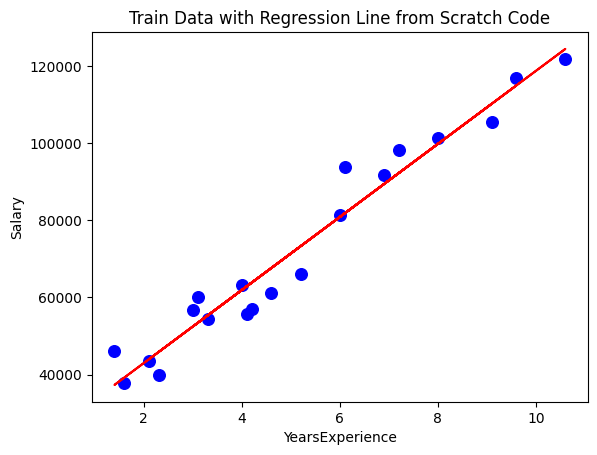

In [16]:
# Plot the line along with our training data points
plt.scatter(x_train, y_train, s=70, c='b')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Train Data with Regression Line from Scratch Code')

plt.plot(x_train, (bias + weights*x_train), c='r')

plt.show()

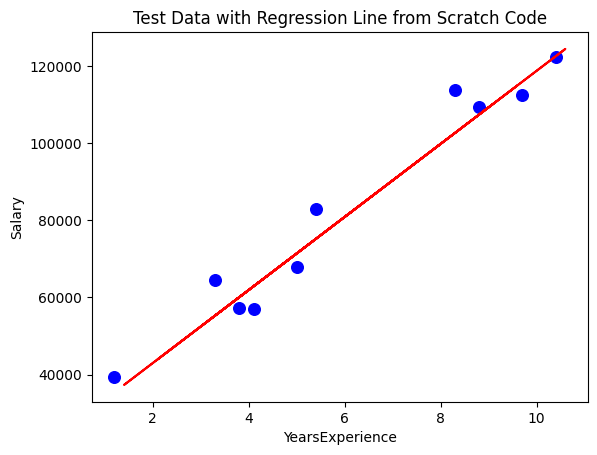

In [17]:
# Plot the line along with our test data points
plt.scatter(x_test, y_test, s=70, c='b')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Test Data with Regression Line from Scratch Code')

plt.plot(x_train, (bias + weights*x_train), c='r')

plt.show()

# Evaluation

This one can be complex. We now are actually calculating error. We need $R^2$ from this. So this is how we get it. Follow the trail of formulas:

Error:

$\large E = \sum_{i=0}^{n}(y_{test} - y_{pred})$

Squared Error:

$\large SE = \sum_{i=0}^{n}(E_{i}^{2})$

Mean Squared Error:

$\large MSE = \frac{SE}{n}$

Root Mean Squared Error:

$\large RMSE = \sqrt{MSE}$

Relative Mean Squared Error:

$\large rMSE = \frac{RMSE}{Var(x_{pred})}$

Coefficient of Determination:

$\large R^2 = 1 - rMSE$

Uh here is something you might require. Variance is basically refers to a statistical measurement of the spread between numbers in a data set. Simpler words, variance measures how far each number in the set is from the mean (average), and thus from every other number in the set. Here is it's formula:

$\large Var(x) = \frac{\sum_{i=0}^{n}(x_{i} - \bar{x})^2}{n}$

Yup a long trail. Below I tried to implement seperately to get you a feel of how each of these signify different thing.

In [18]:
# Calculate Accuracy (Did nested Function call to make you understand what goes where)

def Error(preds, y_test):
    errorList = []  
    for i in range(len(preds)):
        errorList.append(y_test[i][0] - preds[i][0])
    return errorList

def SquaredError(errorList):
    SE = 0
    for i in range(len(errorList)):
        SE += SE + (errorList[i]**2)
    print(f'Squared Error: {SE}')
    return SE
    
def MeanSquaredError(errorList):
    MSE = SquaredError(errorList)/len(errorList)
    print(f'Mean Squared Error: {MSE}')
    return MSE

def RootMeanSquaredError(errorList):
    RMSE = np.sqrt(MeanSquaredError(errorList))
    print(f'Root Mean Squared Error: {RMSE}')
    return RMSE

def RelativeMeanSquaredError(errorList, y_pred):
    rMSE = RootMeanSquaredError(errorList)/ y_pred.var()
    print(f'Relative Mean Squared Error: {rMSE}')
    return rMSE

def R2(errorList):
    R2 = 1 - RelativeMeanSquaredError(errorList, y_pred)
    print(f'Coefficient of Determination: {R2}')

In [19]:
R2(Error(y_pred, y_test ))

Squared Error: 31496172206.68264
Mean Squared Error: 3149617220.668264
Root Mean Squared Error: 56121.45062868799
Relative Mean Squared Error: 7.235388119447902e-05
Coefficient of Determination: 0.9999276461188055


Now remember I said our output will not be exactly same as the library one? Yeah, here is the answer to that. In the first notebook [Linear Regression using Ordinary Least Square](https://www.kaggle.com/code/pathikviramgama/linear-regression-scratch-with-ols?scriptVersionId=150452856), we were using algebra to calculate the answer. Algebra will always give exact answer no matter number of repeatition we do. Hence we will have exactly same result everytime in that method. But in Gradient Descent, we use Calculus. Calculus is notorious. It gives the answer correctly, but it at its base is approximation, right? Hence on a very minute level we see difference. Hence due to that we might not get the exactly same answer because we dont know how the weights change over time.

Now that was actually easy for me no kidding. There are a lot more things and stuff to manipulate in a linear regression algorithm like regularization and hyperparameter tunning, with variation like L1 and L2 Linear Regression, Ridge Regression, Lasso Regression, Gamma Regression, etc. For now we conclude this code.